
# The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.
# The churn rate measures a company's loss in subscribers for a given period of time.
# Retaining Rate of of Customers
# 1 is customer Exited and 0  Customer Retained

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df= pd.read_csv("train.csv")

In [3]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [4]:
#checking Null Values
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


# Feature Engineering & EDA

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

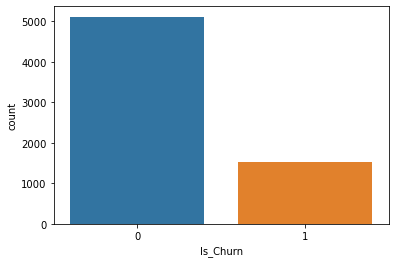

In [7]:
sns.countplot(x=df['Is_Churn'])
#Target has imbalance so we have to balance the target variable for better output

<AxesSubplot:xlabel='Gender', ylabel='count'>

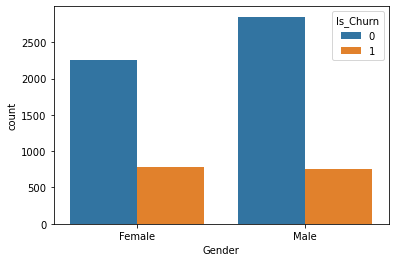

In [8]:
sns.countplot(x=df['Gender'],hue=df['Is_Churn'])

<AxesSubplot:xlabel='Income', ylabel='count'>

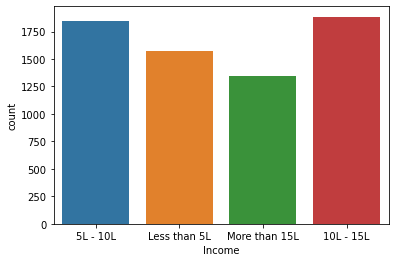

In [9]:
sns.countplot(x=df['Income'])

In [10]:
df.Income.value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [11]:
#mapping income
df['Income_lessthan_5L'] = df['Income'].apply(lambda x : 1 if "Less than 5L" in x else 0)
df['Income_morethan_15L'] = df['Income'].apply(lambda x : 1 if "More than 15L" in x else 0)
df['Income_10to15L'] = df['Income'].apply(lambda x : 1 if "10L - 15L" in x else 0)
df['Income_5to10L'] = df['Income'].apply(lambda x : 1 if "5L - 10L" in x else 0)
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,0,0,0,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,1,0,0,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,0,1,0,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,0,1,0,0
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,0,1,0,0


In [12]:
df.drop(columns=['Income'],inplace = True)

In [13]:
df.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,Female,563266.44,4,0,1,0,Average,1,0,0,0,1
1,57fea15e,53,Female,875572.11,2,1,1,1,Poor,0,1,0,0,0
2,8df34ef3,35,Female,701607.06,2,1,2,0,Poor,0,0,1,0,0
3,c5c0788b,43,Female,1393922.16,0,1,2,1,Poor,1,0,1,0,0
4,951d69c4,39,Female,893146.23,1,1,1,1,Good,1,0,1,0,0


<AxesSubplot:xlabel='Vintage', ylabel='count'>

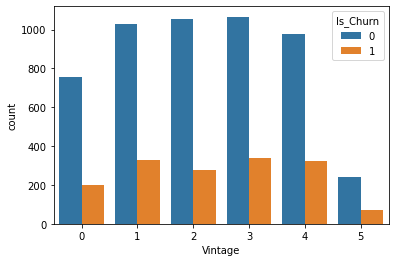

In [14]:
sns.countplot(x=df['Vintage'],hue=df['Is_Churn'])

In [15]:
df.columns

Index(['ID', 'Age', 'Gender', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn',
       'Income_lessthan_5L', 'Income_morethan_15L', 'Income_10to15L',
       'Income_5to10L'],
      dtype='object')

<Figure size 1008x576 with 0 Axes>

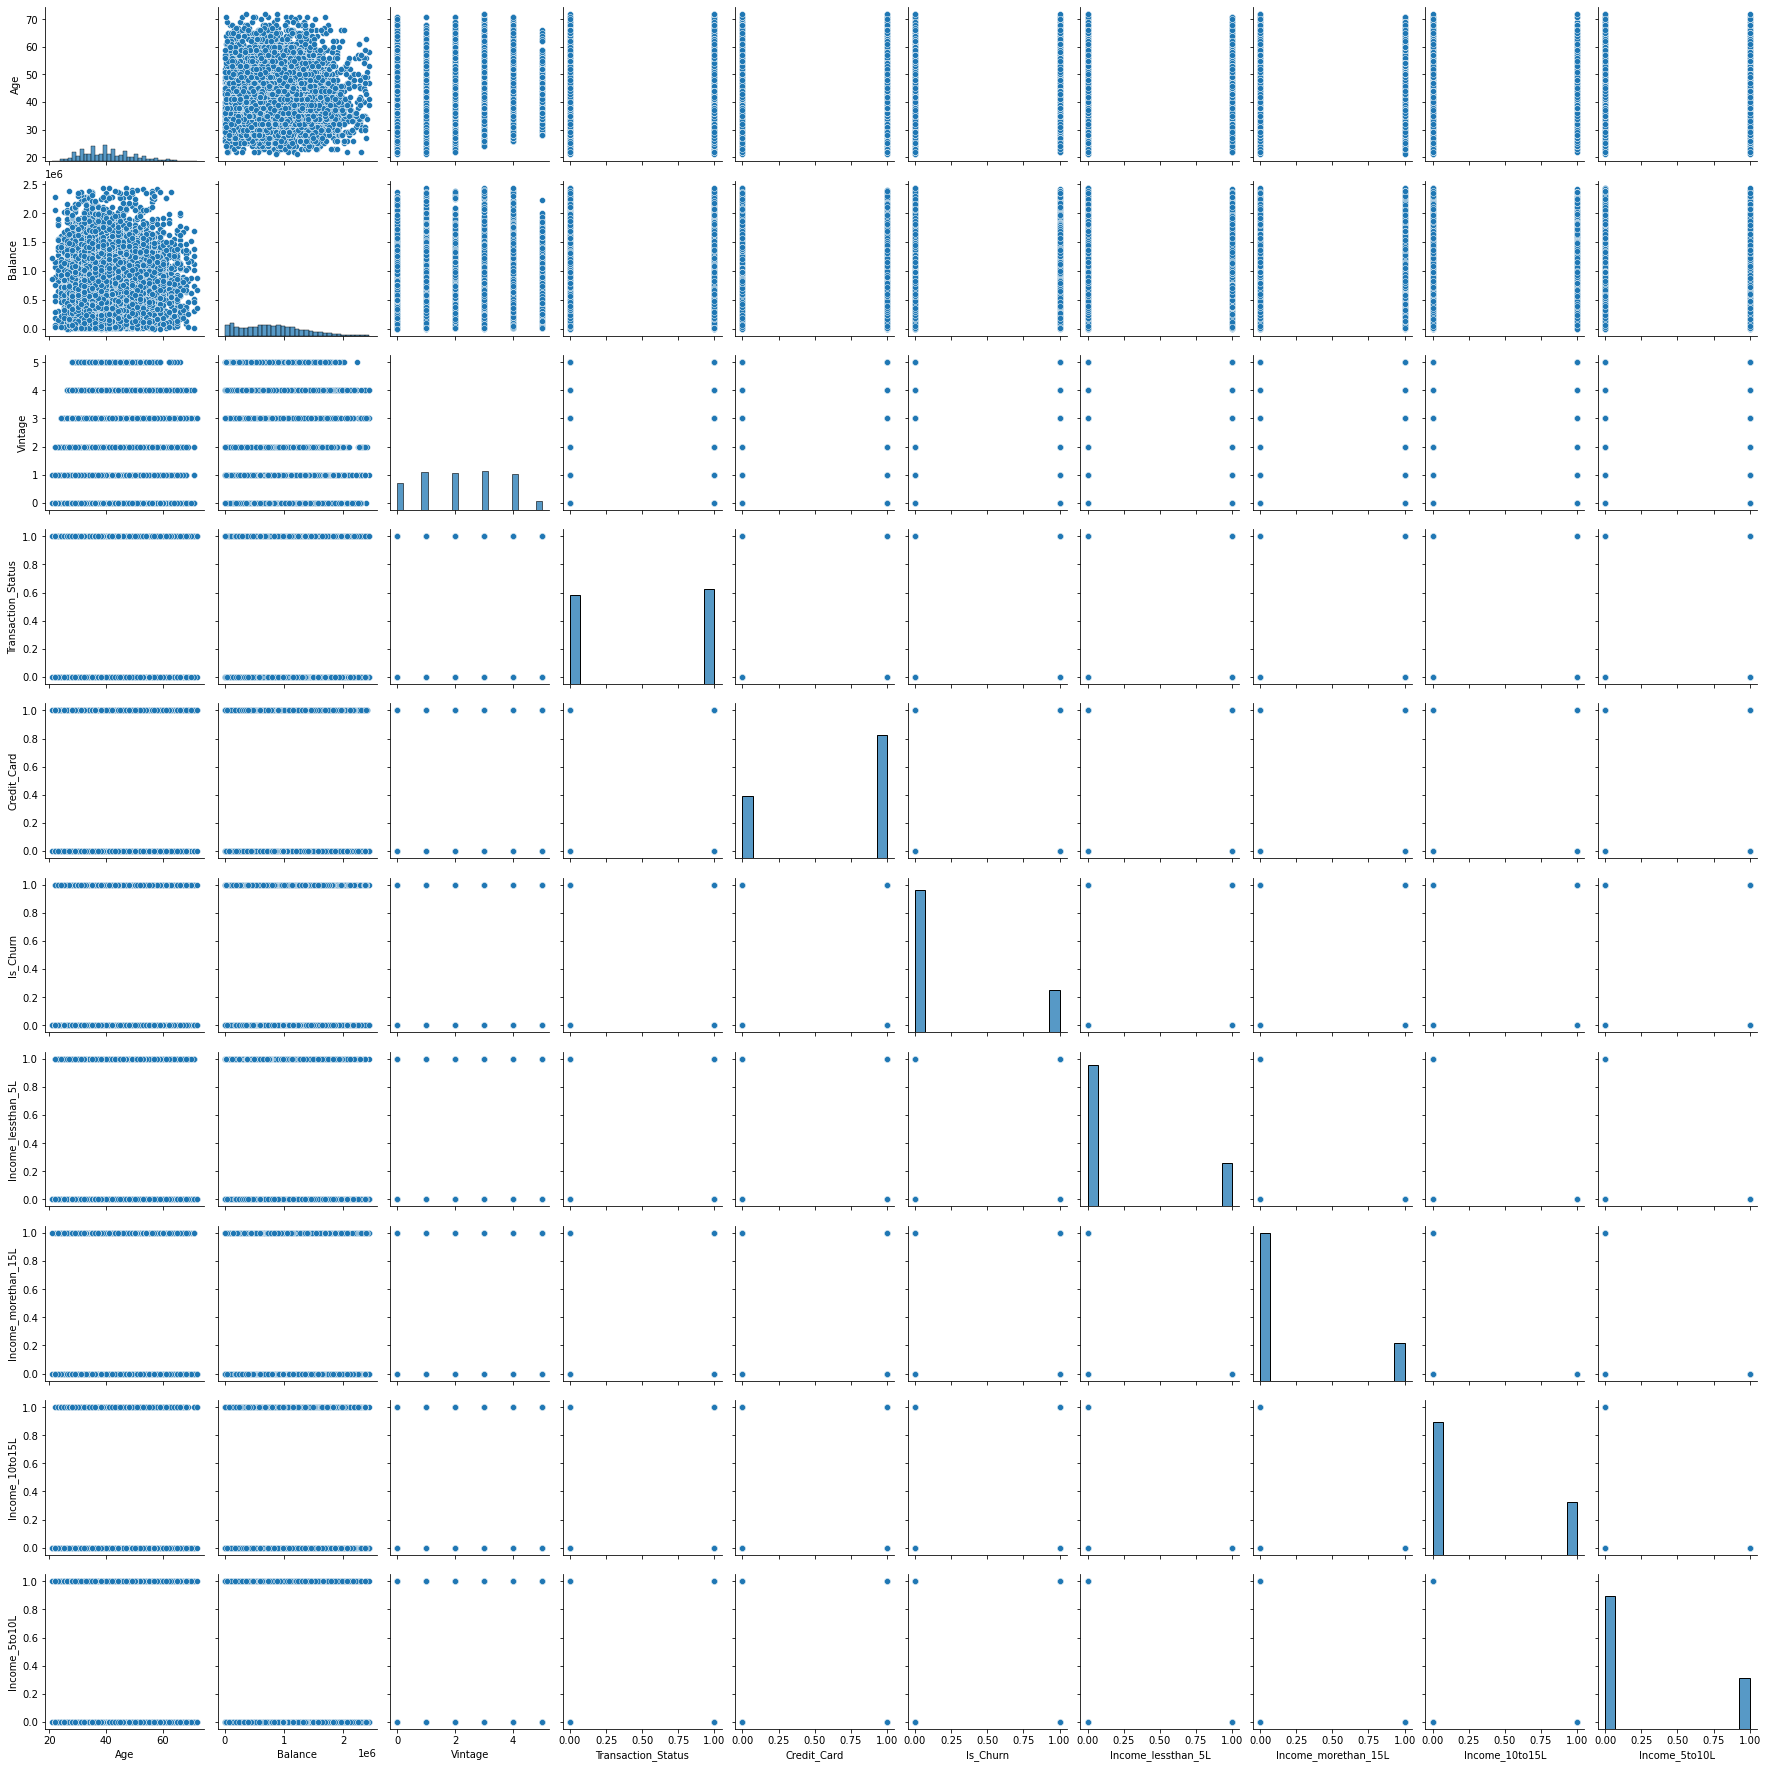

In [16]:
plt.figure(figsize=(14,8))
sns.pairplot(df)

In [17]:
df.Gender.value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [18]:
dict1 = {"Male":1,"Female":0}
df['Gender'] = df['Gender'].replace(dict1)

In [19]:
df.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,0,563266.44,4,0,1,0,Average,1,0,0,0,1
1,57fea15e,53,0,875572.11,2,1,1,1,Poor,0,1,0,0,0
2,8df34ef3,35,0,701607.06,2,1,2,0,Poor,0,0,1,0,0
3,c5c0788b,43,0,1393922.16,0,1,2,1,Poor,1,0,1,0,0
4,951d69c4,39,0,893146.23,1,1,1,1,Good,1,0,1,0,0


In [20]:
df.Credit_Category.value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [21]:
dict2 = {"Poor":1,"Average":2,"Good":3}
df['Credit_Category'] = df['Credit_Category'].replace(dict2)

In [22]:
df.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,0,563266.44,4,0,1,0,2,1,0,0,0,1
1,57fea15e,53,0,875572.11,2,1,1,1,1,0,1,0,0,0
2,8df34ef3,35,0,701607.06,2,1,2,0,1,0,0,1,0,0
3,c5c0788b,43,0,1393922.16,0,1,2,1,1,1,0,1,0,0
4,951d69c4,39,0,893146.23,1,1,1,1,3,1,0,1,0,0


In [23]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6650 non-null   object 
 1   Age                  6650 non-null   int64  
 2   Gender               6650 non-null   int64  
 3   Balance              6650 non-null   float64
 4   Vintage              6650 non-null   int64  
 5   Transaction_Status   6650 non-null   int64  
 6   Product_Holdings     6650 non-null   object 
 7   Credit_Card          6650 non-null   int64  
 8   Credit_Category      6650 non-null   int64  
 9   Is_Churn             6650 non-null   int64  
 10  Income_lessthan_5L   6650 non-null   int64  
 11  Income_morethan_15L  6650 non-null   int64  
 12  Income_10to15L       6650 non-null   int64  
 13  Income_5to10L        6650 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 727.5+ KB


In [24]:
df.Product_Holdings.value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [25]:
df['Product_Holdings'] = df['Product_Holdings'].replace('3+',3).astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6650 non-null   object 
 1   Age                  6650 non-null   int64  
 2   Gender               6650 non-null   int64  
 3   Balance              6650 non-null   float64
 4   Vintage              6650 non-null   int64  
 5   Transaction_Status   6650 non-null   int64  
 6   Product_Holdings     6650 non-null   int32  
 7   Credit_Card          6650 non-null   int64  
 8   Credit_Category      6650 non-null   int64  
 9   Is_Churn             6650 non-null   int64  
 10  Income_lessthan_5L   6650 non-null   int64  
 11  Income_morethan_15L  6650 non-null   int64  
 12  Income_10to15L       6650 non-null   int64  
 13  Income_5to10L        6650 non-null   int64  
dtypes: float64(1), int32(1), int64(11), object(1)
memory usage: 701.5+ KB


<AxesSubplot:>

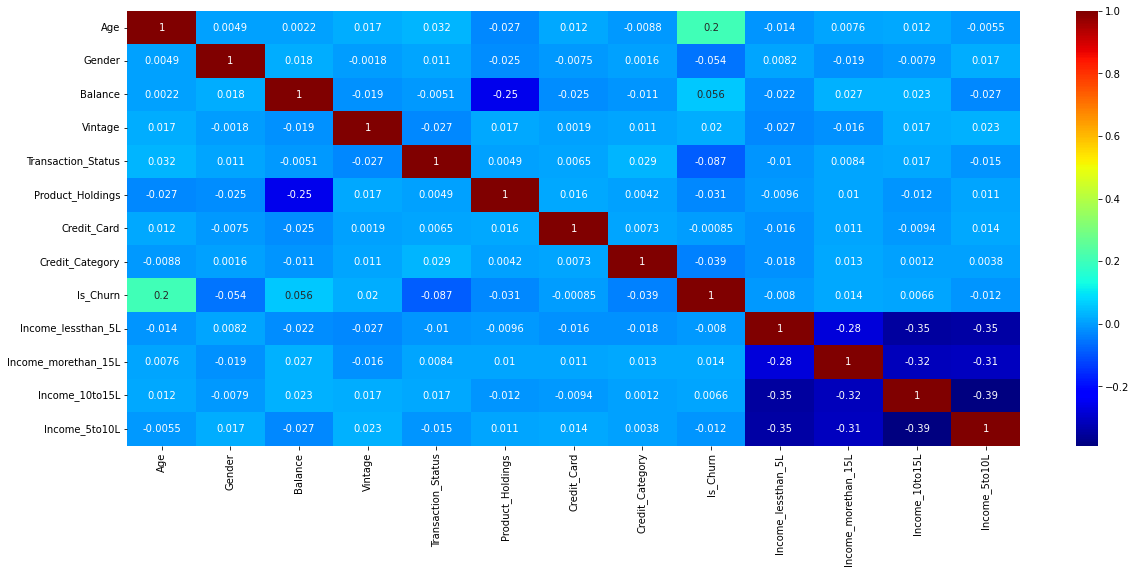

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8
sns.heatmap(df.corr(),annot=True,cmap="jet")

In [28]:
df.columns

Index(['ID', 'Age', 'Gender', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn',
       'Income_lessthan_5L', 'Income_morethan_15L', 'Income_10to15L',
       'Income_5to10L'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

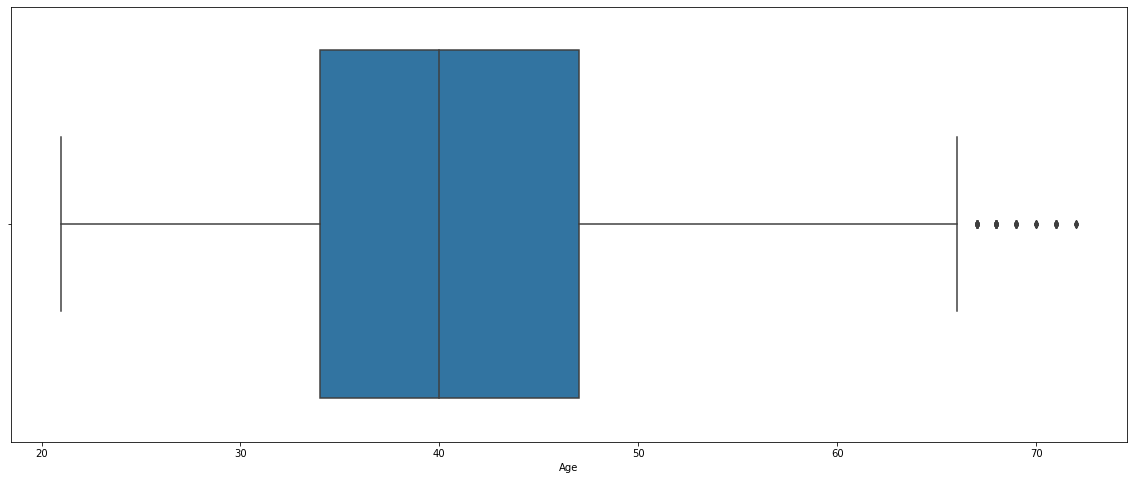

In [29]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Gender'>

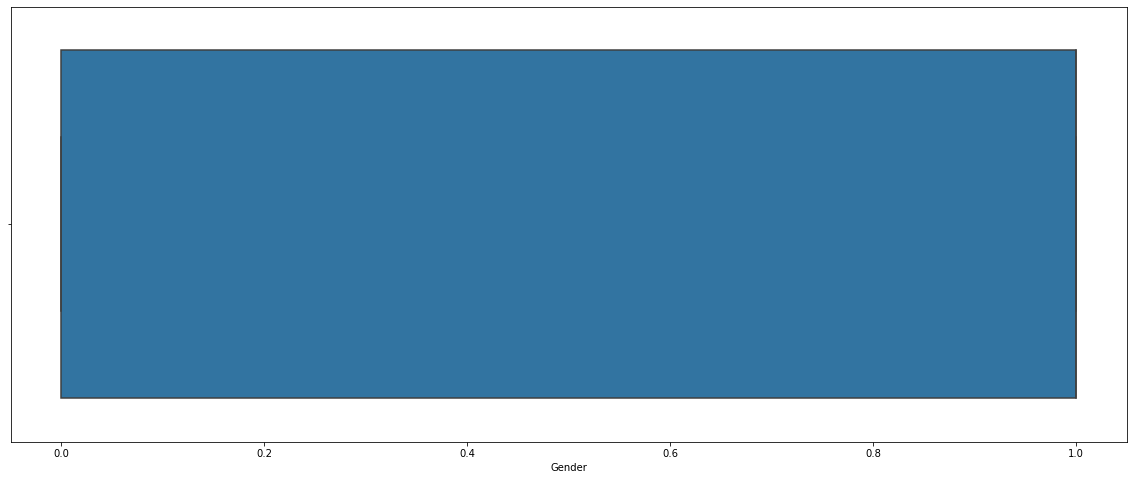

In [30]:
sns.boxplot(x=df["Gender"])

<AxesSubplot:xlabel='Balance'>

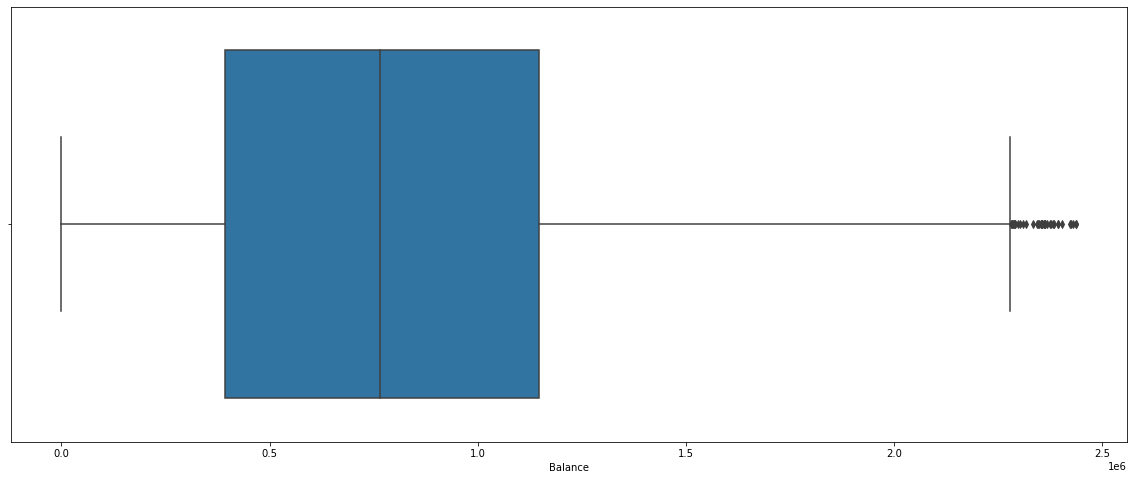

In [31]:
sns.boxplot(x=df["Balance"])

In [32]:
df.columns

Index(['ID', 'Age', 'Gender', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn',
       'Income_lessthan_5L', 'Income_morethan_15L', 'Income_10to15L',
       'Income_5to10L'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6650 non-null   object 
 1   Age                  6650 non-null   int64  
 2   Gender               6650 non-null   int64  
 3   Balance              6650 non-null   float64
 4   Vintage              6650 non-null   int64  
 5   Transaction_Status   6650 non-null   int64  
 6   Product_Holdings     6650 non-null   int32  
 7   Credit_Card          6650 non-null   int64  
 8   Credit_Category      6650 non-null   int64  
 9   Is_Churn             6650 non-null   int64  
 10  Income_lessthan_5L   6650 non-null   int64  
 11  Income_morethan_15L  6650 non-null   int64  
 12  Income_10to15L       6650 non-null   int64  
 13  Income_5to10L        6650 non-null   int64  
dtypes: float64(1), int32(1), int64(11), object(1)
memory usage: 701.5+ KB


<Figure size 1008x576 with 0 Axes>

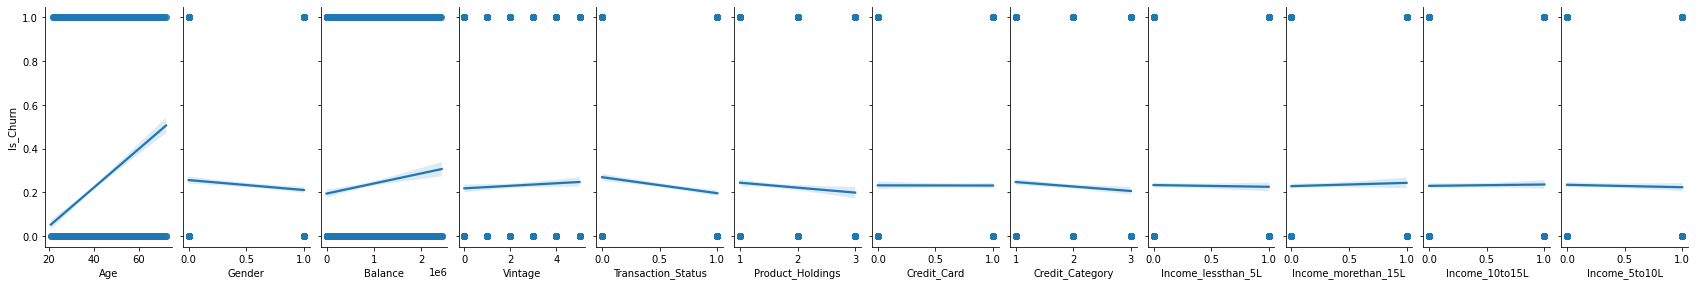

In [34]:
#Pairplot and Relation Between Target and Other Columns to find the Better Features
plt.figure(figsize=(14,8))
sns.pairplot(df,x_vars=[ 'Age', 'Gender', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Income_lessthan_5L', 'Income_morethan_15L', 'Income_10to15L',
       'Income_5to10L'],y_vars='Is_Churn',height = 4,aspect = 0.5,kind='reg')

In [35]:
df

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,0,563266.44,4,0,1,0,2,1,0,0,0,1
1,57fea15e,53,0,875572.11,2,1,1,1,1,0,1,0,0,0
2,8df34ef3,35,0,701607.06,2,1,2,0,1,0,0,1,0,0
3,c5c0788b,43,0,1393922.16,0,1,2,1,1,1,0,1,0,0
4,951d69c4,39,0,893146.23,1,1,1,1,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,1,1354526.19,4,1,2,1,1,1,0,0,0,1
6646,153a306b,42,0,596286.54,3,1,2,1,2,0,0,0,0,1
6647,d4075a95,29,1,979298.19,2,0,2,0,1,0,1,0,0,0
6648,5855b142,66,0,395233.65,3,0,2,1,1,1,0,0,1,0


<AxesSubplot:>

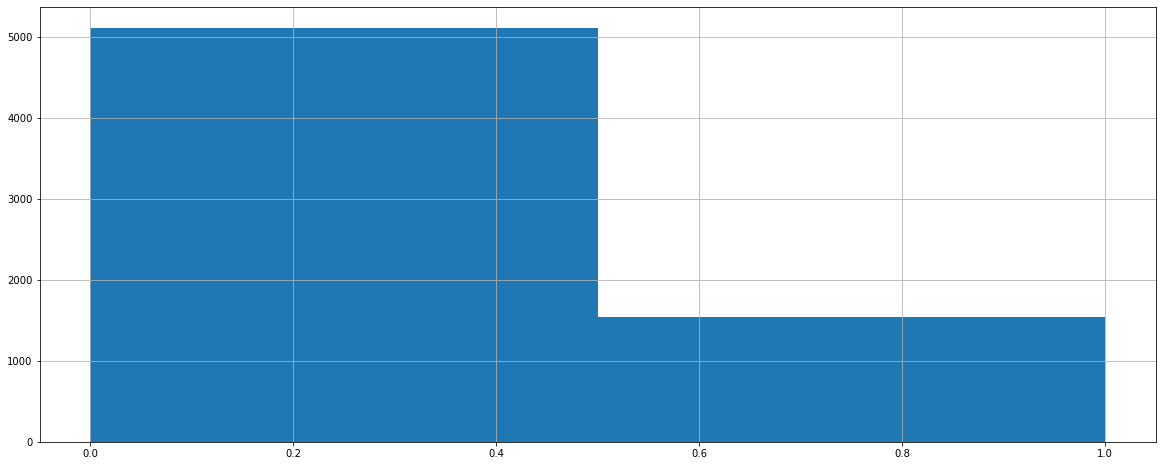

In [36]:
# Checking credit score
df["Is_Churn"].hist(bins=2)


<AxesSubplot:title={'center':'Balance Distribution'}, xlabel='Balance', ylabel='Count'>

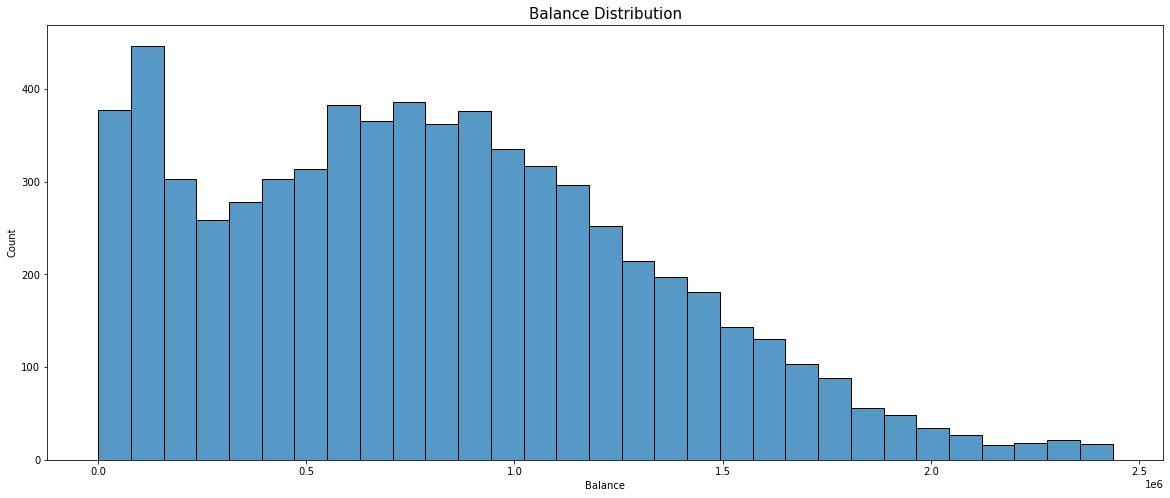

In [37]:
plt.title('Balance Distribution', fontsize=15)
sns.histplot(df.Balance)


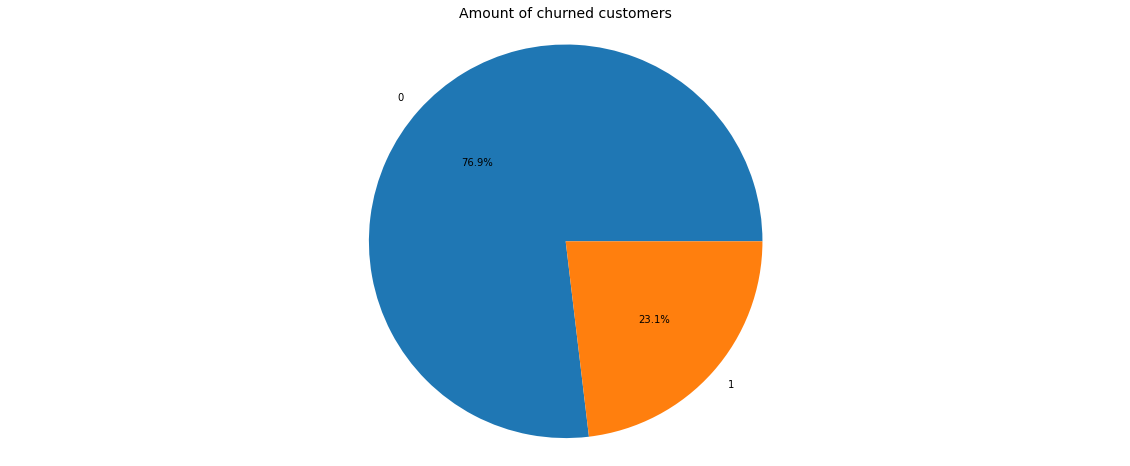

In [38]:
target = df["Is_Churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

In [39]:
df.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,0,563266.44,4,0,1,0,2,1,0,0,0,1
1,57fea15e,53,0,875572.11,2,1,1,1,1,0,1,0,0,0
2,8df34ef3,35,0,701607.06,2,1,2,0,1,0,0,1,0,0
3,c5c0788b,43,0,1393922.16,0,1,2,1,1,1,0,1,0,0
4,951d69c4,39,0,893146.23,1,1,1,1,3,1,0,1,0,0


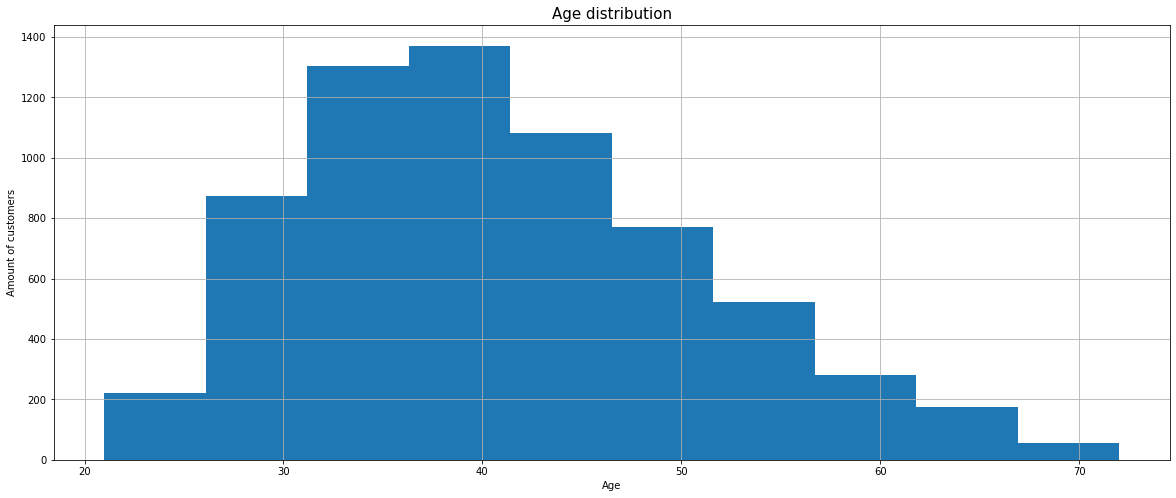

In [40]:
# Checking the overal distribution
df["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

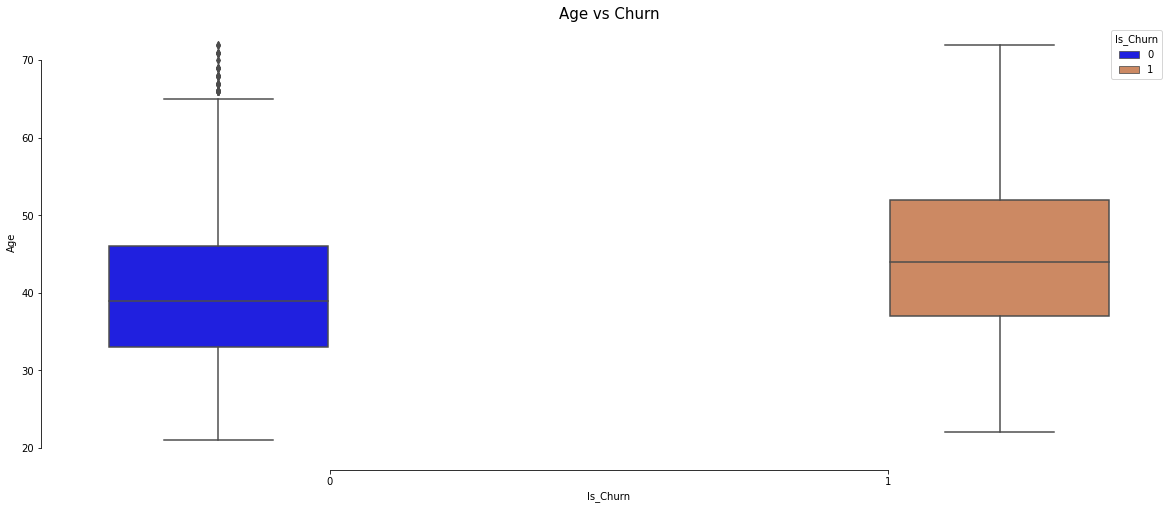

In [41]:
# Comparing the age distribution vs the target
sns.boxplot(x="Is_Churn", y="Age",
            hue="Is_Churn", palette=["b", "#DD8452"],
            data=df).set_title("Age vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

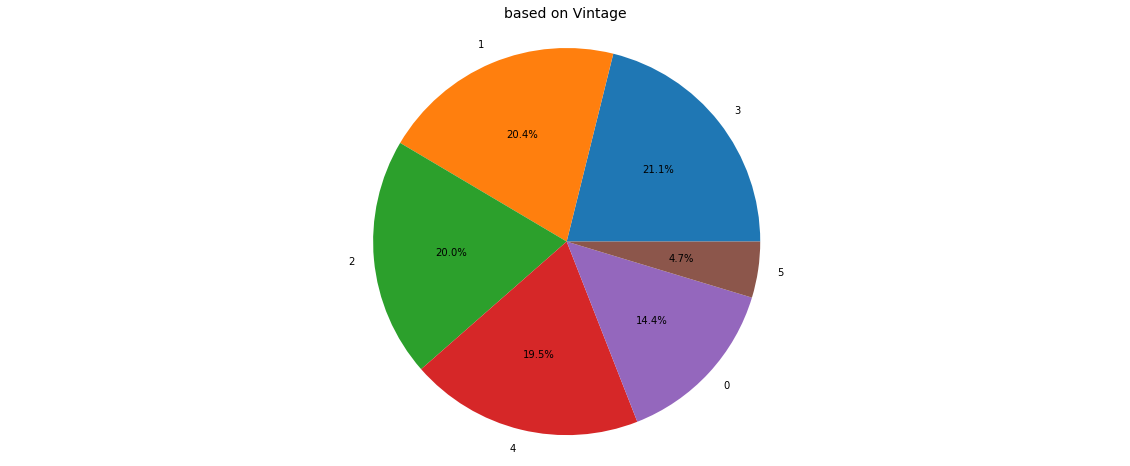

In [42]:
target = df["Vintage"].value_counts()    
fig1, ax1 = plt.subplots()    
ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("based on Vintage", fontsize=14)
plt.show()


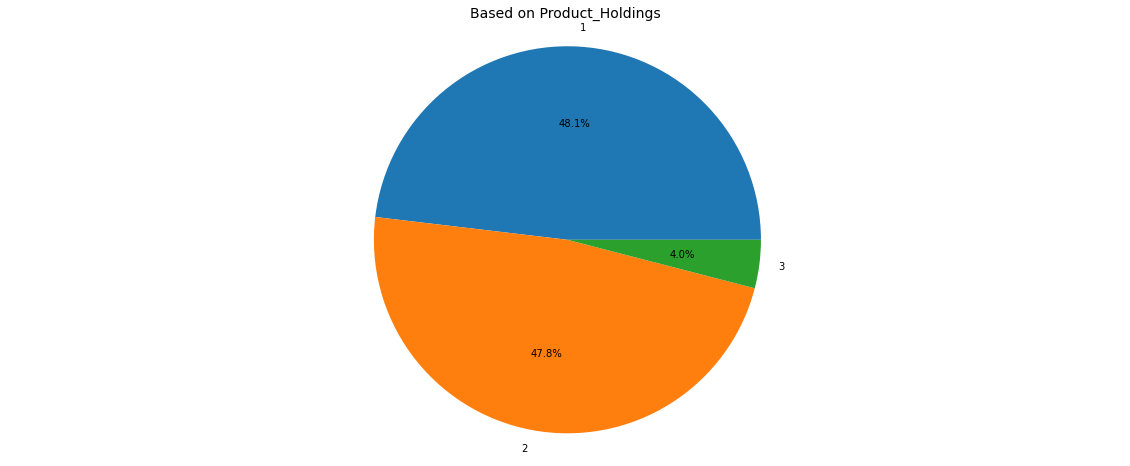

In [43]:
target = df["Product_Holdings"].value_counts()    
fig1, ax1 = plt.subplots()    
ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Based on Product_Holdings", fontsize=14)
plt.show()


X and Y Split

In [44]:
df.columns

Index(['ID', 'Age', 'Gender', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn',
       'Income_lessthan_5L', 'Income_morethan_15L', 'Income_10to15L',
       'Income_5to10L'],
      dtype='object')

In [45]:
X= df.drop(columns=['Is_Churn'])
X

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,84e2fcc9,36,0,563266.44,4,0,1,0,2,0,0,0,1
1,57fea15e,53,0,875572.11,2,1,1,1,1,1,0,0,0
2,8df34ef3,35,0,701607.06,2,1,2,0,1,0,1,0,0
3,c5c0788b,43,0,1393922.16,0,1,2,1,1,0,1,0,0
4,951d69c4,39,0,893146.23,1,1,1,1,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,1,1354526.19,4,1,2,1,1,0,0,0,1
6646,153a306b,42,0,596286.54,3,1,2,1,2,0,0,0,1
6647,d4075a95,29,1,979298.19,2,0,2,0,1,1,0,0,0
6648,5855b142,66,0,395233.65,3,0,2,1,1,0,0,1,0


In [46]:
X = X.drop(columns=['ID'])
X

,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,36,0,563266.44,4,0,1,0,2,0,0,0,1
1,53,0,875572.11,2,1,1,1,1,1,0,0,0
2,35,0,701607.06,2,1,2,0,1,0,1,0,0
3,43,0,1393922.16,0,1,2,1,1,0,1,0,0
4,39,0,893146.23,1,1,1,1,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6645,61,1,1354526.19,4,1,2,1,1,0,0,0,1
6646,42,0,596286.54,3,1,2,1,2,0,0,0,1
6647,29,1,979298.19,2,0,2,0,1,1,0,0,0
6648,66,0,395233.65,3,0,2,1,1,0,0,1,0


In [47]:
Y = df['Is_Churn']
Y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.25)

Decision Tree Classifier

In [49]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier(max_depth = 3)

In [50]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
Y_train_pred = DTC.predict(X_train)
Y_test_pred = DTC.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
#train set precitiion Evaluation
confusion_matrix(Y_train, Y_train_pred)

array([[3782,   54],
       [1081,   70]], dtype=int64)

In [54]:
confusion_matrix(Y_test, Y_test_pred)

array([[1258,   19],
       [ 361,   25]], dtype=int64)

In [55]:
accuracy_score(Y_test, Y_test_pred)

0.7714972940469031

KNN CLASSSIIFER

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
acc_list = []
err_list = []
for i in range(1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

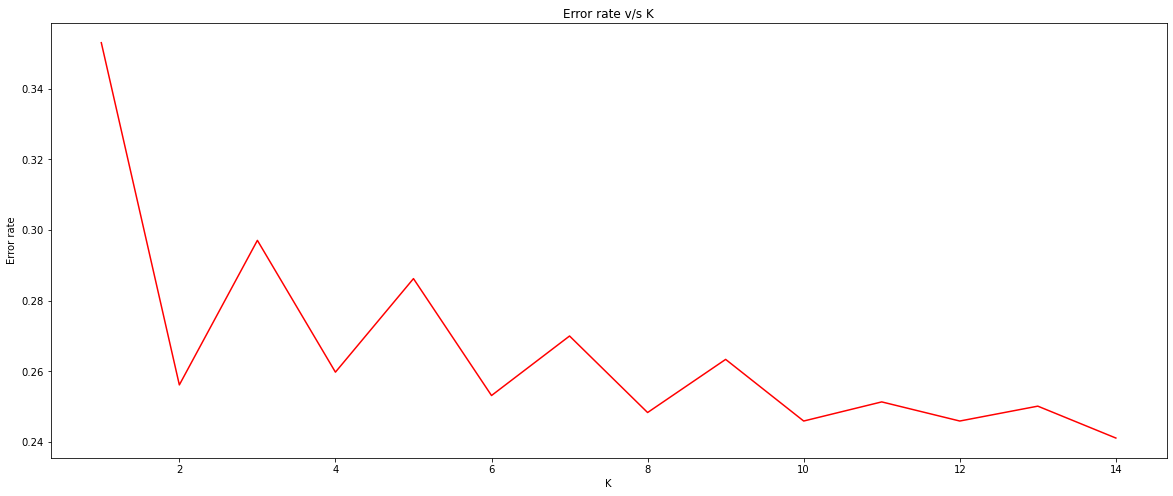

In [58]:
plt.plot(list(range(1,15)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [59]:
KNC = KNeighborsClassifier(n_neighbors=14)
KNC.fit(X_train,Y_train)
Y_pred = KNC.predict(X_test)

In [60]:
confusion_matrix(Y_test,Y_pred)

array([[1259,   18],
       [ 383,    3]], dtype=int64)

In [162]:
accuracy_score(Y_test,Y_pred)

0.7678893565844859

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_pred = LogReg.predict(X_test)
cfm = confusion_matrix(Y_test,Y_pred)
cfm

In [ ]:
accuracy_score(Y_test,Y_pred)

# Test Data

In [62]:
test = pd.read_csv("test.csv")

In [63]:
test

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor


In [68]:
#checking Null Values
test.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [70]:
#mapping income
test['Income_lessthan_5L'] = test['Income'].apply(lambda x : 1 if "Less than 5L" in x else 0)
test['Income_morethan_15L'] = test['Income'].apply(lambda x : 1 if "More than 15L" in x else 0)
test['Income_10to15L'] = test['Income'].apply(lambda x : 1 if "10L - 15L" in x else 0)
test['Income_5to10L'] = test['Income'].apply(lambda x : 1 if "5L - 10L" in x else 0)
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0,1,0,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,0,0,0,1
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0,0,1,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,1,0,0,0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,0,1,0,0


In [71]:
test.drop(columns=['Income'],inplace= True)

In [73]:
test.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,55480787,50,Female,1008636.39,2,1,2,1,Average,0,1,0,0
1,9aededf2,36,Male,341460.72,2,0,2,1,Average,0,0,0,1
2,a5034a09,25,Female,439460.10,0,0,2,1,Good,0,0,1,0
3,b3256702,41,Male,28581.93,0,1,2,1,Poor,1,0,0,0
4,dc28adb5,48,Male,1104540.03,2,1,3+,0,Good,0,1,0,0


In [74]:
dict1 = {"Male":1,"Female":0}
test['Gender'] = test['Gender'].replace(dict1)

In [75]:
dict2 = {"Poor":1,"Average":2,"Good":3}
test['Credit_Category'] = test['Credit_Category'].replace(dict2)

In [76]:
test['Product_Holdings'] = test['Product_Holdings'].replace('3+',3).astype(int)

In [78]:
X1 = test.drop(columns=['ID'])

In [79]:
X1

,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Income_lessthan_5L,Income_morethan_15L,Income_10to15L,Income_5to10L
0,50,0,1008636.39,2,1,2,1,2,0,1,0,0
1,36,1,341460.72,2,0,2,1,2,0,0,0,1
2,25,0,439460.10,0,0,2,1,3,0,0,1,0
3,41,1,28581.93,0,1,2,1,1,1,0,0,0
4,48,1,1104540.03,2,1,3,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2846,40,0,1338458.22,0,0,1,1,1,0,0,1,0
2847,48,0,1448280.27,0,1,2,1,2,0,1,0,0
2848,59,1,1100555.64,3,0,1,1,1,0,1,0,0
2849,34,0,1502818.92,2,0,1,1,1,0,0,0,1


In [80]:
Y_tst = DTC.predict(X1)

In [97]:
Y_tst

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [159]:
Y_tst

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)